In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/bolzanosynthetic.csv'
df = pd.read_csv(file_path, sep=',')

In [4]:
df.head(31)

,temp,humidity,windspeed,winddir,cloudcover,uvindex,encons,room1,room2,room3
0,9.6,75.5,14.8,182.0,58.7,3,35.57,15.48,12.71,11.92
1,8.9,82.7,9.6,61.7,26.9,5,35.73,15.89,13.12,12.41
2,9.8,85.8,14.0,158.9,68.1,5,35.51,15.37,12.60,11.83
3,7.0,84.8,23.9,57.8,69.4,5,36.97,12.43,9.66,8.74
4,6.2,65.9,20.4,330.5,7.6,5,37.04,13.73,10.96,10.09
5,4.7,70.5,17.9,311.0,30.1,5,37.89,11.50,8.73,7.90
6,5.5,70.2,7.7,54.9,37.8,5,37.48,12.15,9.38,8.70
7,4.9,70.2,12.6,251.6,28.7,5,37.76,11.80,9.03,8.28
8,5.8,82.3,13.3,235.6,57.7,4,37.46,11.73,8.96,8.19
9,8.0,90.9,14.1,250.1,53.8,3,36.34,14.05,11.28,10.50


In [86]:
# Separate features and label
X = df.drop(df.columns[6], axis=1)  # Select all columns but number 6
y = df.iloc[:, 6]   # Select seventh column as the label

In [87]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Initialize the model
model = DecisionTreeRegressor()  # Changed to a regression model

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using a regression metric
mse = mean_squared_error(y_test, y_pred)
print(f'Model Mean Squared Error: {mse}')

# Create a DataFrame for displaying actual vs predicted values
results_df = pd.DataFrame({'Actual Label': y_test, 'Predicted Label': y_pred})

# Print the DataFrame
print(results_df)

Model Mean Squared Error: 0.0693000000000002
    Actual Label  Predicted Label
27         39.77            39.57
15         37.42            36.97
23         39.55            39.47
17         37.22            36.97
8          37.46            37.76
9          36.34            36.46


In [89]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold cross-validation

# Initialize the model
model = DecisionTreeRegressor()

# Store the actual and predicted labels
actual_labels = []
predicted_labels = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Append the actual and predicted labels for plotting
    actual_labels.extend(y_test)
    predicted_labels.extend(y_pred)

# Evaluate the model using cross-validation
y_pred_cv = cross_val_predict(model, X, y, cv=kf)
mse_cv = mean_squared_error(y, y_pred_cv)
print(f'Model Mean Squared Error with K-Fold Cross-Validation: {mse_cv}')

Model Mean Squared Error with K-Fold Cross-Validation: 0.07828999999999928


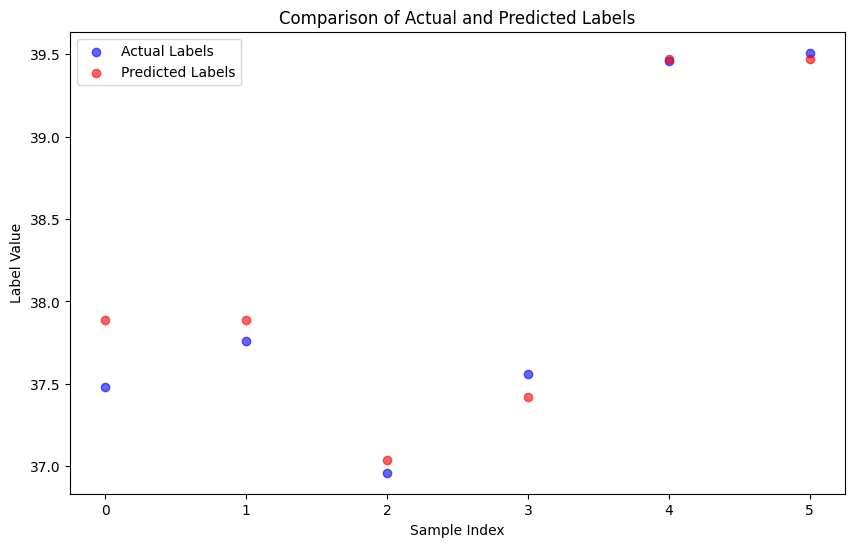

In [90]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Labels', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.title('Comparison of Actual and Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label Value')
plt.legend()
plt.show()


In [27]:
# Split the DataFrame into features and labels
X = df.iloc[:, :6]  # First 6 columns as features
y = df.iloc[:, -3:]  # Last 3 columns as labels

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold cross-validation

# Initialize the model
modelroom = DecisionTreeRegressor()

# Variable to store the predictions from the last iteration
last_iteration_predictions = None
last_iteration_actual = None

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    modelroom.fit(X_train, y_train)

    # Make predictions for the current iteration
    y_pred = modelroom.predict(X_test)

    # Store the predictions from the last iteration
    last_iteration_predictions = y_pred
    last_iteration_actual = y_test

# Now, compare the predictions with actual labels
print("Comparing Predictions with Actual Labels from the Last Iteration:")
for i in range(len(last_iteration_actual)):
    print(f"Sample {i+1}:")
    print(f"  Actual Labels: {last_iteration_actual.iloc[i]}")
    print(f"  Predicted Labels: {last_iteration_predictions[i]}\n")

Comparing Predictions with Actual Labels from the Last Iteration:
Sample 1:
  Actual Labels: room1    12.15
room2     9.38
room3     8.70
Name: 6, dtype: float64
  Predicted Labels: [11.07  8.3   7.58]

Sample 2:
  Actual Labels: room1    11.80
room2     9.03
room3     8.28
Name: 7, dtype: float64
  Predicted Labels: [11.73  8.96  8.19]

Sample 3:
  Actual Labels: room1    13.26
room2    10.49
room3     9.81
Name: 10, dtype: float64
  Predicted Labels: [12.35  9.58  8.83]

Sample 4:
  Actual Labels: room1    11.34
room2     8.57
room3     7.77
Name: 14, dtype: float64
  Predicted Labels: [11.07  8.3   7.58]

Sample 5:
  Actual Labels: room1    8.04
room2    5.27
room3    4.42
Name: 19, dtype: float64
  Predicted Labels: [8.22 5.45 4.59]

Sample 6:
  Actual Labels: room1    7.74
room2    4.97
room3    4.11
Name: 20, dtype: float64
  Predicted Labels: [7.73 4.96 4.18]



In [108]:
file_path = '/content/drive/My Drive/bolzanoforecast.csv'
df2 = pd.read_csv(file_path, sep=';')

In [109]:
df2.head(30)

,temp,humidity,windspeed,winddir,cloudcover,uvindex
0,0.2,86.1,9.4,0.7,54.8,3
1,2.0,91.0,11.5,108.7,87.5,1
2,2.2,85.3,12.7,135.2,85.1,1
3,3.7,94.4,14.9,165.1,85.8,0
4,4.5,92.1,17.1,180.6,89.6,1
5,-0.5,81.9,8.2,324.7,26.6,4
6,-0.9,78.9,7.6,346.5,26.2,4


In [110]:
X2 = df2.iloc[:]  # Select first 6 columns as features
num_columns = len(df2.columns)

In [111]:
# Feature Scaling
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Make predictions
y_pred2 = modelroom.predict(X2)

In [114]:
df3 = df2

# Add new columns for predictions
df3["room1"] = None
df3["room2"] = None
df3["room3"] = None

df3.index = df2.index

#The value of the temperature of the current day before the working time (let's say 9:00 A.M.)
#should be taken from the sensor reading. For simplicity we use synthetic data.
df3.loc[0, "room1"] = y_pred2[0][0]
df3.loc[0, "room2"] = y_pred2[0][1]
df3.loc[0, "room3"] = y_pred2[0][2]

# Assign predictions to the new columns
for i in range(1, len(y_pred2)):
    df3.loc[i, "room1"] = y_pred2[i][0]
    df3.loc[i, "room2"] = y_pred2[i][1]
    df3.loc[i, "room3"] = y_pred2[i][2]

# Save the DataFrame with predictions to a new CSV file
df3.to_csv("/content/drive/My Drive/bolzanoroompredicted.csv", index=False)

In [115]:
df3

,temp,humidity,windspeed,winddir,cloudcover,uvindex,room1,room2,room3
0,0.2,86.1,9.4,0.7,54.8,3,9.59,6.82,5.84
1,2.0,91.0,11.5,108.7,87.5,1,11.73,8.96,8.19
2,2.2,85.3,12.7,135.2,85.1,1,11.43,8.66,7.78
3,3.7,94.4,14.9,165.1,85.8,0,14.05,11.28,10.5
4,4.5,92.1,17.1,180.6,89.6,1,15.48,12.71,11.92
5,-0.5,81.9,8.2,324.7,26.6,4,6.47,3.7,2.99
6,-0.9,78.9,7.6,346.5,26.2,4,7.12,4.35,3.67


In [116]:
len(y_pred2)

7

In [117]:
X3 = df3.iloc[:]
num_columns = len(df3.columns)

In [120]:
# Feature Scaling
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

y_pred3 = model.predict(X3)

print('Predictions for the incoming 7 days, current day included', y_pred3)

Predictions for the incoming 7 days, current day included [38.84 37.46 37.42 36.34 35.51 39.55 40.23]


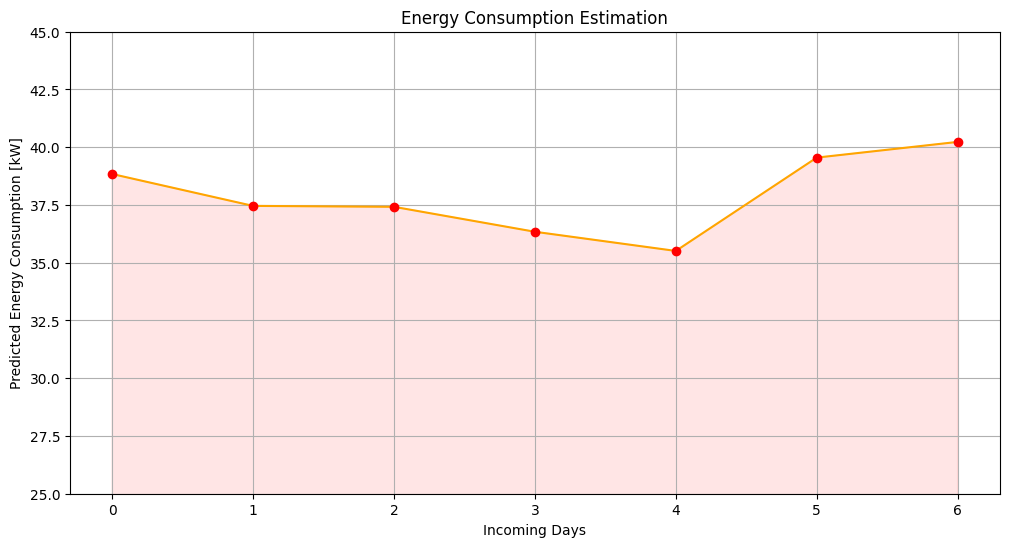

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred3, color='orange')
plt.plot(y_pred3, 'o', color='red')
x = np.arange(len(y_pred3))
plt.fill_between(x, y_pred3, color="red", alpha=0.1)
plt.xlabel('Incoming Days')
plt.ylabel('Predicted Energy Consumption [kW]')
plt.ylim(25, 45)
plt.title('Energy Consumption Estimation')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred3, color='orange')
plt.plot(y_pred3, 'o', color='red')
x = np.arange(len(y_pred3))
plt.fill_between(x, y_pred3, color="red", alpha=0.1)
plt.xlabel('Incoming Days')
plt.ylabel('Predicted Energy Consumption [kW]')
plt.ylim(25, 45)
plt.title('Energy Consumption Estimation')
plt.grid(True)
plt.show()